In [6]:
import joblib
# ^^^ pyforest auto-imports - don't write above this line
import joblib
import matplotlib.pyplot as plt
import numpy as np
import optuna
from sktime.forecasting.model_selection import SlidingWindowSplitter
from sktime.forecasting.model_selection import ExpandingWindowSplitter
from sktime.forecasting.trend import PolynomialTrendForecaster
from egbz.utils import *

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

In [16]:
data = joblib.load('../training_data/data.dataset')
y = data['hosp']

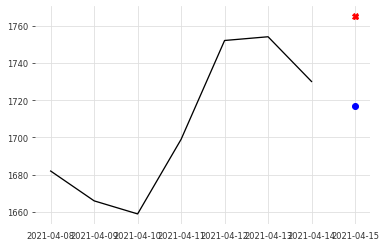

In [97]:
y_75 = y.sel(zone='75').to_pandas()
y_train = y_75[-14:-7]
y_test = y_75[-7:-6]
forecaster = PolynomialTrendForecaster(degree=1)
forecaster.fit(y_train, fh=i)
y_pred = forecaster.predict()
plot_prediction(
    y_train,
    y_test,
    y_pred,
    historic_size=5
)


In [47]:
def plot_prediction(
    y_train,
    y_test,
    y_pred,
    historic_size=20
):
    plt.plot(y_train[-20:]);
    plt.plot(y_test, c='blue', marker='o')
    plt.plot(y_pred, c='red', marker='X')